### Unterschied Sparse-/Dense-Vector: 
Dense Vektor: <br>
speichert alle Zahlen in einem Vector, z.B. one-hot-encodet: [0,0,0,0,0,0,0,0,0,1] <br>
Sparse Vektor:<br>
speichert nur die Zahlen von Bedeutung oder anders: Sparse Vektor speichert NICHT die Zahlen, die xtrem oft vorkommen oder unbedeutend sind d.h. Umsetzung erfolgt mit Dictionaries
BEISPIEL VON OBEN ALS SPARSE VECTOR: {(9), (1)}  -> {} = Dictionarie, erster Para = IDs von den "wichtigen" Zahlen 2. Para = Zahl, die unter dieser ID abgespeichert ist (Reihenfolge ist entscheidend da Position der ID bestimmt, welchen Wert diese ID adressiert)<br><br>
Anderes Beispiel: And for exemple a dense vector (1, 2, 0, 0, 5, 0, 9, 0, 0) will be represented as {(0,1,4,6), (1, 2, 5, 9)}

## Decision Trees (for Classification)

In a decision tree the data is split at each node according to a decision rule. This corresponds to nested _if-then-else_-rules. In the _if_-part of such a rule are decison is made based on a feature of the data record. 

We will use the scikit learn implementation. For this implementation the features must be binary or have (at least) ordinal characteristic. If a feature is e.g. nominal with many values, it must be converted to a set of binary (one-hot-coded) features.


The splitting rules in the scikit learn implementation are binary and are based on a threshold, e.g.
  - _if $x_6 <= 2.14$ then_ left subbranch, _else_ right subbranch.         
  - binary features must be coded as 0/1, so the rule becomes: if $x_2 <= 0.5$ _then_ left subbranch, _else_ right subbranch. 


<!--The structure of the tree will be determined by data (see below) and a training procedure.-->

In the leafs of the tree the (class) predictions are made. There are two possibilities for such an inference: 
   - hard assignment: Predict for the data records which end up on a leaf by the majority class of the training data that end up on that leaf.          
   - soft assignment: Assign probabilities according to the distribution of the classes in respect to the training data which end up on that leaf.

As an example of a decision tree we will learn the following tree from the titanic data set: 
<img src="./data/titanic.png" width="1000px"/>

A full explanation of the tree will be given later. Here just look at the desion rules (first line of the inner nodes) and at the last line of the leafs. In each leaf you see a array with counts of the different targets (train data): [number_died number_survivors] .

### Learning 

Finding a tree that splits the traing data optimal is np-hard. Therefore often a _greedy_-strategy is used:

To build up a decision tree the algorithm starts at the root of the tree. The feature and the threshold 
that splits the training data best (with respect to the classes) are choosen. In an iterative way the whole tree is build up by such splitting rules. 

There are different criteria for measuring the "separation (split) quality". The most important ones are:

- Gini Impurity 
- Information Gain 

In this tutorial we use the information gain.

#### Information Gain as splitting criterion

The entropy with respect to the target class variable $y$ of a training data set $\mathcal D$ is defined as:

$$
 H(y, \mathcal D) = - \sum_{y \in \mathcal Y} p(y|\mathcal D) \log_2 p(y|\mathcal D)
$$
with the domain of the target values $\mathcal Y = \{t_1, t_2,... \}$.


The probabilities are estimated by 
$$
  p(y=t_i, \mathcal D) = |\mathcal D^{(y=t_i)}| /|\mathcal D| 
$$    


with the number of training data $|\mathcal D|$  and the number of training data $|\mathcal D^{(y=t_i)}|$ with target label $t_i$: 


On a node a (binary) split on a feature $x_k$ is made by the split rule $x_k \leq v$. 
As result there are two data sets $\mathcal D_0$ and $\mathcal D_1$ for the left resp. the right branch.

The feature $x_k$ and the split value $v$ are choosen that they maximize the 'reduction of the entropy' measured by the information gain $I$:
$$
  I(y; x_k) = H(y, \mathcal D) - H(y|x_k) = H(y, \mathcal D) - \sum_{j=0}^1 p_jH(y, \mathcal D_j) =
  H(y, \mathcal D) + \sum_{j=0}^1  \sum_{y \in \mathcal Y} \frac{|\mathcal D_j|}{|\mathcal D|} p(y|\mathcal D_j) \log_2 p(y|\mathcal D_j)
$$
Note that $p_{j=0}$  is the estimated probability that a random data record of $\mathcal D$ has feature value $x_k \leq v$ which can be estimated by ${|\mathcal D_0|}/{|\mathcal D|}$ (analog for $j=1$).

$p(y=t_i|\mathcal D_0)$ can also be estimated by the fraction of the counts ${|\mathcal D_0^{(y=t_i)}|}/{|\mathcal D_0|}$. 
So the information gain can be computed just with counts:


$$
  I(y; x_k) = 
   \sum_{y \in \mathcal Y} \frac{|\mathcal D^{(y=t_i)}|}{|\mathcal D|}  \log_2 \frac{|\mathcal D^{(y=t_i)}|}{|\mathcal D|} + \sum_{j=0}^1  \sum_{y \in \mathcal Y} \frac{|\mathcal D_j^{(y=t_i)}|}{|\mathcal D|}  \log_2 \frac{|\mathcal D_j^{(y=t_i)}|}{|\mathcal D_j|}
$$


<!--$|\mathcal D_0|$ respectivly $|\mathcal D_1|$ is the number of elements in the splitted data sets.-->
 

#### Overfitting

Deep decision trees generalize often poorly. The following remedies reduce overfitting: 

- Limitation of the maximal depth of the tree. 
- Pruning with an validation set either during training (pre-pruning) or after training (post-pruning).
- Dimensionality reduction (reducing the number of features before training)


Also often combining decision trees to an ensemble (decision forests) is used against overfitting.  

### Example: Survival of the Titanic 


First you have read in the titanic data with pandas:

In [1]:
import pandas as pd
import numpy as np
train_df = pd.read_csv("train.csv")

`train_df` is a [_pandas_](http://pandas.pydata.org/) [data frame](http://pandas.pydata.org/pandas-docs/stable/dsintro.html). 
Let's view the data. 

In [2]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Scikit's learn decision trees can handle only numeric data. So we must convert the nominal `Sex` feature. 

In [3]:
train_df['Sex'].replace(['female'],0,inplace=True)
train_df['Sex'].replace( ['male'],1,inplace=True)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


`Survived` is the target, that we want to predict from the values of the other columns.   
But not all of the other columns are helpful for classification. So we choose a feature set by hand and convert the features into a numpy array for scikit learn. 

In [4]:
y = targets = labels  =  train_df['Survived'] # output is numpy.ndarray
features = train_df[["Fare", "Pclass", "Sex", "Age", "SibSp"]]
columns = ["Fare", "Pclass", "Sex", "Age", "SibSp"]
sizeee = np.array(features.get("Sex")).size

In [5]:
tmp = features["Sex"]
print("Number of men(1) richtig: ", len(list(tmp[tmp==1])))
features = features.values
print(features)

Number of men(1) richtig:  577
[[ 7.25    3.      1.     22.      1.    ]
 [71.2833  1.      0.     38.      1.    ]
 [ 7.925   3.      0.     26.      0.    ]
 ...
 [23.45    3.      0.         nan  1.    ]
 [30.      1.      1.     26.      0.    ]
 [ 7.75    3.      1.     32.      0.    ]]


There are missing values (`nan`). We use the scikit learn `Imputer` to replace them by the mean of the columns.

In [6]:
from sklearn.preprocessing import Imputer
mean_imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)

# Train the imputor on the df dataset
mean_imputer = mean_imputer.fit(features)

# Apply the imputer to the df dataset
features = mean_imputer.transform(features)
features

array([[ 7.25      ,  3.        ,  1.        , 22.        ,  1.        ],
       [71.2833    ,  1.        ,  0.        , 38.        ,  1.        ],
       [ 7.925     ,  3.        ,  0.        , 26.        ,  0.        ],
       ...,
       [23.45      ,  3.        ,  0.        , 29.69911765,  1.        ],
       [30.        ,  1.        ,  1.        , 26.        ,  0.        ],
       [ 7.75      ,  3.        ,  1.        , 32.        ,  0.        ]])

Now we are ready to learn a decision tree by the criterion 'Information Gain' and we restrict the depth of the tree to 3.
We use the [scikit learn decison tree module](http://scikit-learn.org/stable/modules/tree.html).

We use a splitting criterion the 'Information Gain'!

In [7]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(features, labels)                               


`clf` is an instance of a trained decision tree classifier.

The decision tree can be visualized. For this we must write an graphviz dot-File  

In [8]:
from sklearn.externals.six import StringIO
with open("titanic.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f, feature_names=columns)

The dot file can be converted with the graphiz `dot`- renderer to an image.

    dot -Tpng titanic.dot -o titanic.png

Here is the graph:

#### Hier sieht man also, da wir oben unser entscheidungskriterium auf entropy gesetzt haben, wird 1. zu jedem Attribut(z.B. Sex) der Entropie-Wert bestimmt, und 2. das Attribut mit der hächsten Entropie als Root benutzt
#### Falsch siehe SibSp - Node
#### Es wird das als Root genommen, bei dem bei einem split der Information Gain am höchsten ist

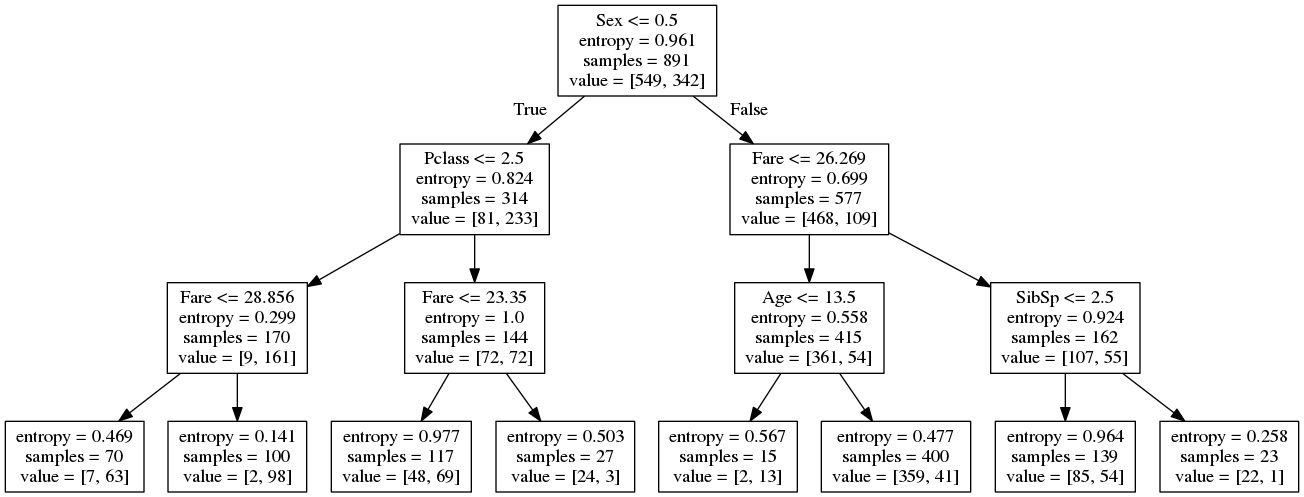

In [9]:
from IPython.display import Image
Image(filename='titanic.png') 

#### Root node is the attribute that splits the dataset the best

According to the decision tree the main criterion (root node) for survival is the sex of the passenger. In the left subtree are the women passengers (sex = 0), in the right subtree the men (sex=1). 

In the leafs the class information is given by a `value` array. Here the second value is the number of survivers in the leafs.

For example the leftmost leaf represents passengers that are male (sex=0) with fare<=26.2687 and age<=13.5. 13 of such boys survived and 2 of them died.

The entropy $- \sum p_i \log_2 (p_i)$ is displayed also at each node (splitting criterion).

#### Nicht: (sondern immer auf das Merkmal bezogen -> [true,false])
 VALUE IN JEDEM LEAVE BEZEICHNET IMMER ZAHL [MEN,WOMEN] unter den jeweiligen Bedingungen

### Exercises: Splitting criterion entropy / information gain

#### Exercise 1: 

Compute the root node entropy (with numpy). 

wird wird den Daten entnommen

### highes entropy = 1, kommt zustande bei einer Verteilung von 0.5 zu 0.5 -> d.h. höchste Unsicherheit d.h. Das Schwanken zwischen den Klassen 1 & 2 (aka Unsicherheit) ist weniger, wenn die entropy klein ist

In [10]:
import numpy as np
#np.log2(x)
#Ergebnis muss sein: 0.961
# eigentlich richtig, aber man muss irgendwie mit den 
#labels für die Wahrscheinlichkeit arbeiten


#Alt:
    #Warum keine Summe bei folgender Berechnung(wie in Formel)? 
    # Sinn von Summe= Wir haben unterschiedliche Klassen , Summe dient zur Aufsummierung
    #Da wir 1. nur 2 Klassen haben und 2. diese Klassen unterschiedliche Wahrscheinlichkeiten haben
    #lösen wir die Summe auf und schreiben diese Aufsummierung einfach explizit hin (geht, da nur 
    # 2 Terme, da nur 2 Klassen(Man,Frau))
    #entropy_of_sex = -(p_men*np.log2(p_men) + p_women*np.log2(p_women))
# Ersetzt durch Summe, indem ich die verschiedenen WS in ein array gepackt habe

def calculate_entropy_root_node():
    #tmp2 =features[:,2] # get Sex - values
    p_men = targets[targets==1].size/targets.size ####################################################### DIE WAHRSCHEINLICHKEIT WIRD BERECHNET MIT UNSEREN TARGETS, verstehe ich trotzdem nicht, 
                                                #################da wir doch jetzt eigentlich nur die entropy für survived berechnen target == 1 bedeuted ja survived und nicht geschlecht male
    p_women = float((targets[targets==0]).size)/targets.size
    #probability_array = np.array([p_men,p_women])

    #entropy_of_sex = -1 * np.sum(probability_array.dot(np.log2(probability_array)) )
    entropy_temp =  ((-1*p_men * np.log2(p_men)) + (-1*p_women* np.log2(p_women)))
    
    print(entropy_temp, "single calculation: ", entropy_temp)
    return entropy_temp
calculate_entropy_root_node()
# Werte stimmen nicht mit Bild überein, Nur wenn ich labels nehme, die das Survival attribut
# haben stimmen die Werte

0.9607079018756469 single calculation:  0.9607079018756469


0.9607079018756469

#### Exercise 2

Compute the information gain of the first split node (root node). Use the entropy values and the number of data records (samples)
from the decision tree image. 




Information Gain = entropy(parent) – [average entropy(children)] https://homes.cs.washington.edu/~shapiro/EE596/notes/InfoGain.pdf

I(Y ; X) = H(Y ) − H(Y |X)

bedingte Entropie H(Y|X) = - ∑(x∈X) ∑(y∈Y) p(x)*p(y|x)*log(p(y|x))

In [11]:
H_Y = 0.961
#tabelle = tmp2

entropy_frau = 0.824
entropy_man = 0.699

tmp11 = float(314) / 891
tmp22 = float(577) / 891

#advanced slicing
#tabelle[tabelle==1].size/tabelle.size

information_gain = H_Y - (tmp11*entropy_frau + tmp22*entropy_man) # 0.5 da zur Durchschnittsbildung von 2 Klassen NICHT DA BEIDE KLASSEN UNTERSCHIEDLICHE WAHRSCHEINLICHKEITEN HABEN
print("The Information-Gain of the root-split is: ", information_gain)


#0.217

The Information-Gain of the root-split is:  0.2179483726150392


#### Exercise 3
Compute the information gain of the following split table:

|  | class 0  | class 1  |  
|---|---|---|
| feature <= v| 2  | 13  |      
| feature > v | 359  |  41 |   

The numbers are the corresponding data records, e.g. there are 13 data records with target class 1 and feature <= v. 

Write a python function that computes the information gain.The data is given by a python array:

#### The information gain is based on the decrease in entropy after a dataset is split on an attribute. Constructing a decision tree is all about finding attribute that returns the highest information gain (oft mit hoher Entropie verbunden)

In [12]:
#data = np.array([[2.,13.],[359., 41.]])
#print(np.divide(np.sum(data,axis=1),14))
def calculate_entropy_for_excersice_3(array_0,array_1,number_of_rows_sums):
    prob_for_class_0 = np.divide(array_0,number_of_rows_sums)
    prob_for_class_1 = np.divide(array_1,number_of_rows_sums)
    probability_array = np.array([prob_for_class_0,prob_for_class_1])
    entropy_of_vector = -np.sum(probability_array*np.log2(probability_array)) # hier ist mit Sicherheit ein Axis problem
    return entropy_of_vector

def excersice_3(data):
    number_of_all_data = np.sum(data)
    number_of_rows_sums = np.sum(data,axis=1)
    information_gain = np.divide(number_of_rows_sums,number_of_all_data)*calculate_entropy_for_excersice_3(data[:,0],data[:,1],number_of_rows_sums)
    return information_gain
#print(excersice_3(data))


#value_rowNumber_columnNumber
def excersice3():
    value_1_1 = 2
    value_1_2 = 13
    value_2_1 = 359
    value_2_2 = 41
    
    value_1_3 = value_1_1 + value_1_2
    value_2_3 = value_2_1 + value_2_2
    value_3_1 = value_1_1 + value_2_1
    value_3_2 = value_1_2 + value_2_2
    
    value_all = value_3_1 + value_3_2
    
    probability_for_erwartungswer_feature_kleiner = float(value_1_3) / value_all
    probability_for_erwartungswer_feature_groesser = float(value_2_3) / value_all
    
    probability_for_value_1_1 = float(value_1_1) / value_1_3
    probability_for_value_1_2 = float(value_1_2) / value_1_3
    probability_for_value_2_1 = float(value_2_1) / value_2_3
    probability_for_value_2_2 = float(value_2_2) / value_2_3

    #gebraucht für: root entropy
    probability_for_class_0 = float(value_3_1) / value_all
    probability_for_class_1 = float(value_3_2) / value_all

    # Zusammenrechnung der bedingten WS für die Features
#     entropy_feature_kleiner = -1 * ((probability_for_value_1_1 * np.log2(probability_for_value_1_1)) + (probability_for_value_1_2 * np.log2(probability_for_value_1_2)))
#     entropy_feature_groesser = -1 * ((probability_for_value_2_1 * np.log2(probability_for_value_2_1)) + (probability_for_value_2_2 * np.log2(probability_for_value_2_2)))
    
    entropy_feature_kleiner = -1 * ((probability_for_value_1_1 * np.log2(probability_for_value_1_1)) + (probability_for_value_1_2 * np.log2(probability_for_value_1_2)))
    entropy_feature_groesser = -1 * ((probability_for_value_2_1 * np.log2(probability_for_value_2_1)) + (probability_for_value_2_2 * np.log2(probability_for_value_2_2)))
    
    
    
    # Berechnen der Entropien auf Basis der bedingten WS
#     root_entropy = -1 * ((probability_for_class_0 * np.log2(probability_for_class_0)) + (probability_for_class_1 * np.log2(probability_for_class_1)))  
#     bedingteEntropy = ((probability_for_erwartungswer_feature_kleiner*entropy_feature_kleiner) + (probability_for_erwartungswer_feature_groesser*entropy_feature_groesser))

    root_entropy = -1 * ((probability_for_class_0 * np.log2(probability_for_class_0)) + (probability_for_class_1 * np.log2(probability_for_class_1)))  
    bedingteEntropy = ((probability_for_erwartungswer_feature_kleiner*entropy_feature_kleiner) + (probability_for_erwartungswer_feature_groesser*entropy_feature_groesser))

    
    
    
    
    
    
    print("value_1_3:",value_1_3 )

    print("value_2_3:",value_2_3 )

    print("value_3_1:",value_3_1 )

    print("value_3_2:",value_3_2 )

    print("value_all:",value_all )

    print("probability_for_erwartungswer_feature_kleiner:",probability_for_erwartungswer_feature_kleiner )
    
    print("probability_for_erwartungswer_feature_groesser:",probability_for_erwartungswer_feature_groesser )
    print("probability_for_value_1_1 (Wahrscheinlichkeit für Class 0 unter Bed. less then):", probability_for_value_1_1)
    print("probability_for_value_1_2:",probability_for_value_1_2 )
    print("probability_for_value_2_1:",probability_for_value_2_1 )
    print("probability_for_value_2_2:",probability_for_value_2_2 )
    print("probability_for_class_0:",probability_for_class_0 )
    print("probability_for_class_1:",probability_for_class_1 )
    print("entropy_feature_kleiner:", entropy_feature_kleiner)
    print("entropy_feature_groesser:",entropy_feature_groesser )
    print("root_entropy:",root_entropy )
    print("bedingte Entropy: ",bedingteEntropy )

                        
    
    information_gain = root_entropy - bedingteEntropy
    print("Information Gain for excercise3 is: ", information_gain)

excersice3()

value_1_3: 15
value_2_3: 400
value_3_1: 361
value_3_2: 54
value_all: 415
probability_for_erwartungswer_feature_kleiner: 0.03614457831325301
probability_for_erwartungswer_feature_groesser: 0.963855421686747
probability_for_value_1_1 (Wahrscheinlichkeit für Class 0 unter Bed. less then): 0.13333333333333333
probability_for_value_1_2: 0.8666666666666667
probability_for_value_2_1: 0.8975
probability_for_value_2_2: 0.1025
probability_for_class_0: 0.8698795180722891
probability_for_class_1: 0.13012048192771083
entropy_feature_kleiner: 0.5665095065529053
entropy_feature_groesser: 0.47687067894518254
root_entropy: 0.557768514612369
bedingte Entropy:  0.48011063656955805
Information Gain for excercise3 is:  0.07765787804281093


### Prediction

To make predictions with scikit learn, we must convert the data in
the same way as we did it with the training data. Then we could use the method:    

    clf.predict(testdata)
    
Note: The depth of the decision tree is a hyperparameter. So the depth should be determined with the help of a 
validation set or by cross validation.    

### Literature

- [Cri] [A. Criminisi, J. Shotton, and E. Konukoglu, Decision Forests for Classification, Regression, Density Estimation, Manifold Learning and Semi- Supervised Learning, no. MSR-TR-2011-114, 28 October 2011.](http://research.microsoft.com/pubs/155552/decisionForests_MSR_TR_2011_114.pdf)


If you were to manually construct your own decision tree, you would have to select your own root and internal nodes. Those selections would be based on what features you believe to be most valuable in a data set; <br>
------------the best question is the one that reduces the uncertainty the most---------------